### Cleaning the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

%matplotlib inline

In [2]:
rws_2020 = pd.read_csv('2020_rws.csv',encoding='cp1252')
rws_2021= pd.read_csv('2021_rws.csv',encoding='cp1252')

In [3]:
rws_2020.head()

,response id,birth year,gender,industry desc,industry desc (detailed),occupation desc,occupation desc (detailed),organization size,manage others?,household,...,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work and commuting,My working relationships,Preparing for work and commuting,My working relationships,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My personal relationships,My opportunities to socialise
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,"Chief Executives, General Managers and Legisla...",More than 200,Yes,One parent family with dependent children,...,Managing my personal commitments,Preparing for work and commuting,Preparing for work and commuting,Managing my family responsibilities,The number of hours I work,My mental wellbeing,The number of hours I work,My daily expenses,My mental wellbeing,My daily expenses
3,4,1987,Female,"Professional, Scientific and Technical Services","Professional, Scientific and Technical Services",Professionals,ICT Professionals,Between 20 and 199,No,Couple with dependent children,...,Preparing for work and commuting,My opportunities to socialise,My personal relationships,My working relationships,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My personal relationships,My job satisfaction
4,5,1991,Male,"Transport, Postal and Warehousing",Other Transport,Managers,Specialist Managers,Between 5 and 19,Yes,Couple with no dependent children,...,Managing my personal commitments,My working relationships,Preparing for work and commuting,My daily expenses,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My opportunities to socialise,My job satisfaction


In [4]:
rws_2021.head()

,response id,birth year,gender,years at job,industry desc,occupation desc,organization size,household,metro or regional,rw percentage (2020),...,rw helps retention,rw helps recruiting,team collaboration,management is easy,managing poor performers is easy,rw management preparation,results focused manager when rw,employees responsive when rw,productivity (remote vs office),employee productivity (remote vs office)
0,1,1976,Male,More than 5 years,Other Services,Professionals - ICT Professionals,More than 200,Couple with dependent children,Metro,50% - I spent about half of my time remote wor...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 50% more productive when working remotely ...,NaN
1,2,1971,Male,More than 5 years,Construction,Professionals - ICT Professionals,More than 200,Couple with no dependent children,Metro,10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 50% more productive when working remotely ...,NaN
2,3,1978,Female,Between 6 and 12 months,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,Single person,Metro,100% - I spent all of my time remote working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My productivity is about same when I work remo...,NaN
3,4,1962,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,Between 20 and 199,One parent family with dependent children,Regional,40%,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,I’m 50% more productive when working remotely ...,I’m 50% more productive when working remotely ...
4,5,1974,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,More than 200,Couple with dependent children,Regional,100% - I spent all of my time remote working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 20% more productive when working remotely,NaN


In [5]:
common_columns = ['response id',
                'birth year',
                'gender',
                'years at job',
                'industry desc',
                'occupation desc',
                'organization size',
                'household',
                'metro or regional',
                'rw percentage (2020)',
                'preferred rw percentage (2020)',
                'preferred rw percentage (future)',
                'org encouraged rw?',
                'org prepared for rw?',
                'rw is common at org?',
                'rw permission is attainable',
                'rw collaboration easy?',
                'if no covid: employer encourage rw ',
                'if no covid: employer support rw',
                'if no covid: i would have choice about rw',
                'in-person: hours  commuting ',
                'in-person: hours  working',
                'in-person: hours domestic responsibilities',
                'in-person: hours  personal/family time',
                'remote: hours commuting ',
                'remote: hours working',
                'remote: hours domestic responsibilities',
                'remote: hours personal/family time',
                'manage others?',
                'productivity (remote vs office)']

In [6]:
final_df= pd.merge(rws_2020,rws_2021,on=common_columns,how='outer')
final_df = final_df.loc[:, final_df.columns.isin(common_columns)]
final_df


,response id,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,...,if no covid: i would have choice about rw,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities
0,1,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,I’m 50% more productive when working remotely ...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1976,Male,Other Services,Professionals - ICT Professionals,More than 200,No,Couple with dependent children,More than 5 years,Metro,...,Somewhat likely,I’m 50% more productive when working remotely ...,2.0,6.0,7.0,1.0,0.0,8.0,7.0,1.0
2,2,1971,Male,Construction,Professionals - ICT Professionals,More than 200,No,Couple with no dependent children,More than 5 years,Metro,...,Neither unlikely or likely,I’m 50% more productive when working remotely ...,1.5,8.0,6.0,2.0,0.0,10.0,4.0,4.0
3,2,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,I’m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
4,3,1978,Female,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,No,Single person,Between 6 and 12 months,Metro,...,Very likely,My productivity is about same when I work remo...,3.0,8.0,4.0,1.0,1.0,8.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,1508,1995,Male,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Yes,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat likely,I’m 30% more productive when working remotely,2.0,8.0,3.0,4.0,3.0,8.0,3.0,3.0
3015,1509,1993,Female,Health Care and Social Assistance,Professionals - Health Professionals,Between 5 and 19,Yes,Multiple family household,More than 5 years,Metro,...,Very unlikely,My productivity is about same when I work remo...,3.0,10.0,2.0,2.0,1.0,8.0,4.0,3.0
3016,1510,1979,Female,Administrative and Support,Clerical and administrative workers - Clerical...,Between 20 and 199,No,One parent family with dependent children,More than 5 years,Regional,...,Very unlikely,My productivity is about same when I work remo...,3.0,7.0,2.0,4.0,1.0,7.0,4.0,4.0
3017,1511,1965,Female,Education and Training,"Managers - Chief Executives, General Managers ...",Between 1 and 4,Yes,Couple with no dependent children,More than 5 years,Metro,...,Somewhat likely,My productivity is about same when I work remo...,1.0,7.0,4.0,4.0,0.5,7.0,4.5,4.0


In [7]:
final_df.shape

(3019, 30)

In [8]:
final_df.to_csv('final_data.csv')


In [9]:
final_df = final_df.drop(['response id'],axis=1)
final_df['responder_id'] = final_df.index

final_df.head()

,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,rw percentage (2020),...,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities,responder_id
0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,90%,...,I’m 50% more productive when working remotely ...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0,0
1,1976,Male,Other Services,Professionals - ICT Professionals,More than 200,No,Couple with dependent children,More than 5 years,Metro,50% - I spent about half of my time remote wor...,...,I’m 50% more productive when working remotely ...,2.0,6.0,7.0,1.0,0.0,8.0,7.0,1.0,1
2,1971,Male,Construction,Professionals - ICT Professionals,More than 200,No,Couple with no dependent children,More than 5 years,Metro,10%,...,I’m 50% more productive when working remotely ...,1.5,8.0,6.0,2.0,0.0,10.0,4.0,4.0,2
3,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,20%,...,I’m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0,3
4,1978,Female,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,No,Single person,Between 6 and 12 months,Metro,100% - I spent all of my time remote working,...,My productivity is about same when I work remo...,3.0,8.0,4.0,1.0,1.0,8.0,5.0,2.0,4


In [10]:
 #shift column 'responder_id' to first position
first_column = final_df.pop('responder_id')

# insert column using insert(position,column_name,
# first_column) function
final_df.insert(0, 'responder_id', first_column)

final_df.head()
     

,responder_id,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,...,if no covid: i would have choice about rw,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities
0,0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,I’m 50% more productive when working remotely ...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1976,Male,Other Services,Professionals - ICT Professionals,More than 200,No,Couple with dependent children,More than 5 years,Metro,...,Somewhat likely,I’m 50% more productive when working remotely ...,2.0,6.0,7.0,1.0,0.0,8.0,7.0,1.0
2,2,1971,Male,Construction,Professionals - ICT Professionals,More than 200,No,Couple with no dependent children,More than 5 years,Metro,...,Neither unlikely or likely,I’m 50% more productive when working remotely ...,1.5,8.0,6.0,2.0,0.0,10.0,4.0,4.0
3,3,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,I’m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
4,4,1978,Female,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,No,Single person,Between 6 and 12 months,Metro,...,Very likely,My productivity is about same when I work remo...,3.0,8.0,4.0,1.0,1.0,8.0,5.0,2.0


In [11]:
# Convert spaces in column headers to underscores
final_df.columns = final_df.columns.str.replace(' ', '_')

# Remove right parentheses in column headers
final_df.columns = final_df.columns.str.replace(')', '')

# Remove left parentheses in column headers
final_df.columns = final_df.columns.str.replace('(', '')

# Removed Dashes in column headers
final_df.columns = final_df.columns.str.replace('-', '')

# Remove colon in column headers
final_df.columns = final_df.columns.str.replace(':', '')

# Convert slash in column headers to underscores
final_df.columns = final_df.columns.str.replace('/', '_')

# Remove question marks from column headers
final_df.columns = final_df.columns.str.replace('?', '')

# Remove underscore at the end of column names
final_df = final_df.rename(columns=
               {'inperson_hours__commuting_': 'inperson_hours__commuting',
                'remote_hours_commuting_': 'remote_hours_commuting',
                'if_no_covid_employer_encourage_rw_' : 'if_no_covid_employer_encourage_rw'})

In [12]:
final_df.columns

Index(['responder_id', 'birth_year', 'gender', 'industry_desc',
       'occupation_desc', 'organization_size', 'manage_others', 'household',
       'years_at_job', 'metro_or_regional', 'rw_percentage_2020',
       'org_encouraged_rw', 'org_prepared_for_rw', 'rw_is_common_at_org',
       'rw_permission_is_attainable', 'rw_collaboration_easy',
       'preferred_rw_percentage_2020', 'preferred_rw_percentage_future',
       'if_no_covid_employer_encourage_rw', 'if_no_covid_employer_support_rw',
       'if_no_covid_i_would_have_choice_about_rw',
       'productivity_remote_vs_office', 'inperson_hours__commuting',
       'inperson_hours__working', 'inperson_hours__personal_family_time',
       'inperson_hours_domestic_responsibilities', 'remote_hours_commuting',
       'remote_hours_working', 'remote_hours_personal_family_time',
       'remote_hours_domestic_responsibilities'],
      dtype='object')

In [13]:
final_df.dtypes


responder_id                                  int64
birth_year                                    int64
gender                                       object
industry_desc                                object
occupation_desc                              object
organization_size                            object
manage_others                                object
household                                    object
years_at_job                                 object
metro_or_regional                            object
rw_percentage_2020                           object
org_encouraged_rw                            object
org_prepared_for_rw                          object
rw_is_common_at_org                          object
rw_permission_is_attainable                  object
rw_collaboration_easy                        object
preferred_rw_percentage_2020                 object
preferred_rw_percentage_future               object
if_no_covid_employer_encourage_rw            object
if_no_covid_

In [14]:
final_df.isnull().sum()

responder_id                                  0
birth_year                                    0
gender                                        0
industry_desc                                 0
occupation_desc                               0
organization_size                             0
manage_others                               136
household                                     0
years_at_job                                  0
metro_or_regional                             0
rw_percentage_2020                            0
org_encouraged_rw                            31
org_prepared_for_rw                          31
rw_is_common_at_org                          31
rw_permission_is_attainable                  31
rw_collaboration_easy                        31
preferred_rw_percentage_2020                  0
preferred_rw_percentage_future              136
if_no_covid_employer_encourage_rw             0
if_no_covid_employer_support_rw               0
if_no_covid_i_would_have_choice_about_rw

In [15]:
object_datatype_columns=final_df.select_dtypes(include=[object]).columns
print(object_datatype_columns)

Index(['gender', 'industry_desc', 'occupation_desc', 'organization_size',
       'manage_others', 'household', 'years_at_job', 'metro_or_regional',
       'rw_percentage_2020', 'org_encouraged_rw', 'org_prepared_for_rw',
       'rw_is_common_at_org', 'rw_permission_is_attainable',
       'rw_collaboration_easy', 'preferred_rw_percentage_2020',
       'preferred_rw_percentage_future', 'if_no_covid_employer_encourage_rw',
       'if_no_covid_employer_support_rw',
       'if_no_covid_i_would_have_choice_about_rw',
       'productivity_remote_vs_office'],
      dtype='object')


In [16]:
obj_null_final_df=final_df[object_datatype_columns]
obj_null_final_df.isnull().sum()

gender                                        0
industry_desc                                 0
occupation_desc                               0
organization_size                             0
manage_others                               136
household                                     0
years_at_job                                  0
metro_or_regional                             0
rw_percentage_2020                            0
org_encouraged_rw                            31
org_prepared_for_rw                          31
rw_is_common_at_org                          31
rw_permission_is_attainable                  31
rw_collaboration_easy                        31
preferred_rw_percentage_2020                  0
preferred_rw_percentage_future              136
if_no_covid_employer_encourage_rw             0
if_no_covid_employer_support_rw               0
if_no_covid_i_would_have_choice_about_rw      0
productivity_remote_vs_office                 0
dtype: int64

In [17]:
null_obj_f_df = ["manage_others",
                 "org_encouraged_rw",
                 "org_prepared_for_rw",
                 "rw_is_common_at_org",
                 "rw_permission_is_attainable",
                 "rw_collaboration_easy",
                 "preferred_rw_percentage_2020",
                 "preferred_rw_percentage_future"]

In [18]:
final_df[null_obj_f_df] = final_df[null_obj_f_df].fillna("No response")


In [19]:
float_columns=final_df.select_dtypes(include=[np.float64]).columns

In [20]:
float_null_final_df=final_df[float_columns]
float_null_final_df.isnull().sum()

inperson_hours__commuting                    3
inperson_hours__working                      3
inperson_hours__personal_family_time         5
inperson_hours_domestic_responsibilities    17
remote_hours_commuting                      24
remote_hours_working                         3
remote_hours_personal_family_time            7
remote_hours_domestic_responsibilities      18
dtype: int64

In [21]:
for column in final_df.select_dtypes(include=[np.float64]).columns:
    final_df[column] = final_df[column].fillna(final_df[column].median())

In [22]:
final_df.isnull().sum()

responder_id                                0
birth_year                                  0
gender                                      0
industry_desc                               0
occupation_desc                             0
organization_size                           0
manage_others                               0
household                                   0
years_at_job                                0
metro_or_regional                           0
rw_percentage_2020                          0
org_encouraged_rw                           0
org_prepared_for_rw                         0
rw_is_common_at_org                         0
rw_permission_is_attainable                 0
rw_collaboration_easy                       0
preferred_rw_percentage_2020                0
preferred_rw_percentage_future              0
if_no_covid_employer_encourage_rw           0
if_no_covid_employer_support_rw             0
if_no_covid_i_would_have_choice_about_rw    0
productivity_remote_vs_office     

<Axes: >

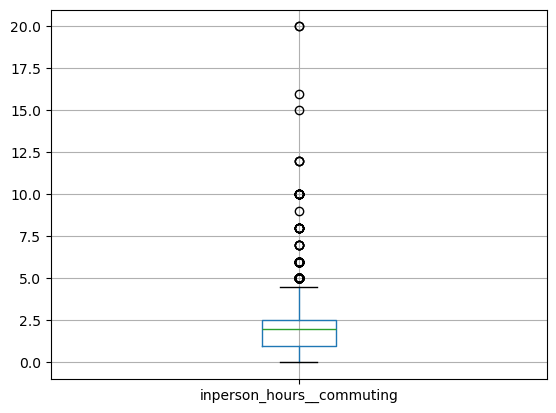

In [23]:
# Generate boxplot to examine outliers for 'inperson_hours__commuting'
final_df.boxplot(column = 'inperson_hours__commuting')

<Axes: >

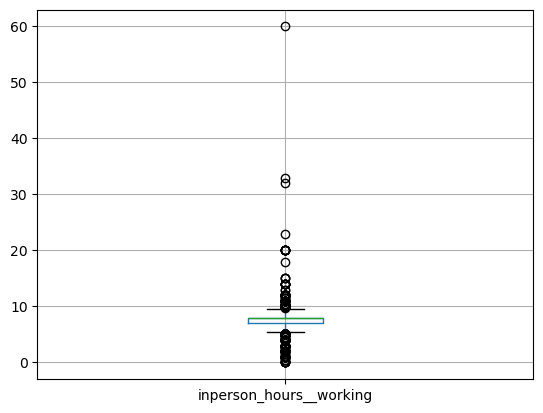

In [24]:
# Generate boxplot to examine outliers for 'inperson_hours__working'
final_df.boxplot(column = 'inperson_hours__working')


<Axes: >

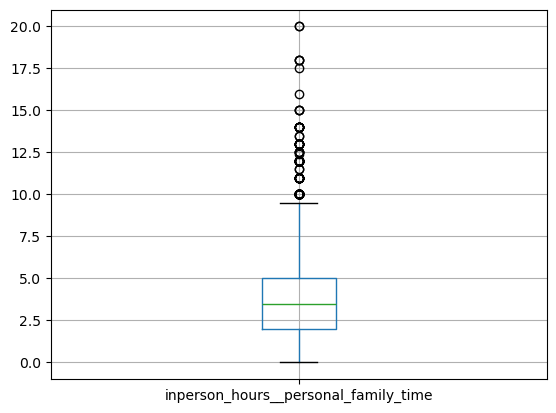

In [25]:
# Generate boxplot to examine outliers for 'inperson_hours__personal_family_time'
final_df.boxplot(column = 'inperson_hours__personal_family_time')

<Axes: >

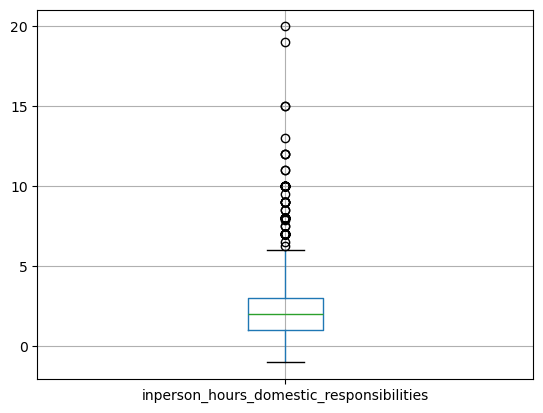

In [26]:
# Generate boxplot to examine outliers for 'inperson_hours_domestic_responsibilities'
final_df.boxplot(column = 'inperson_hours_domestic_responsibilities')

<Axes: >

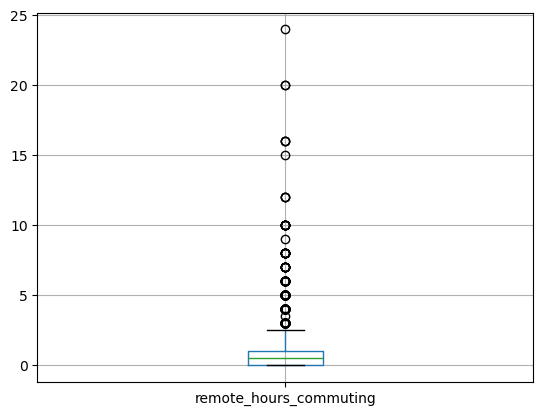

In [27]:
# Generate boxplot to examine outliers for 'remote_hours_commuting'
final_df.boxplot(column = 'remote_hours_commuting')

<Axes: >

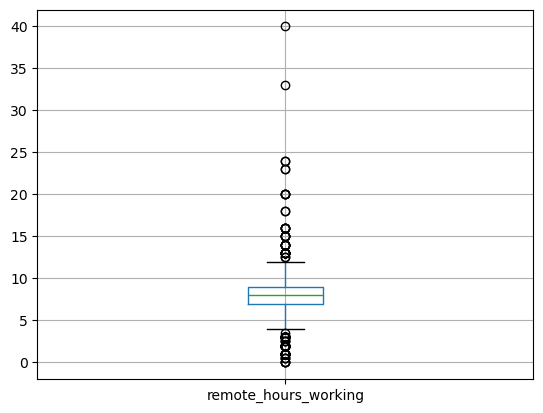

In [28]:
# Generate boxplot to examine outliers for 'remote_hours_working'
final_df.boxplot(column = 'remote_hours_working')

<Axes: >

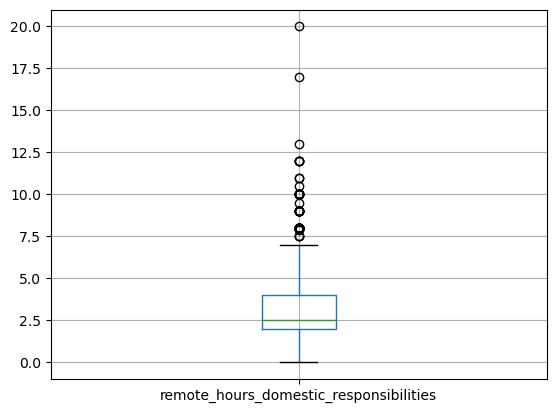

In [29]:
# Generate boxplot to examine outliers for 'remote_hours_domestic_responsibilities'
final_df.boxplot(column = 'remote_hours_domestic_responsibilities')

<Axes: >

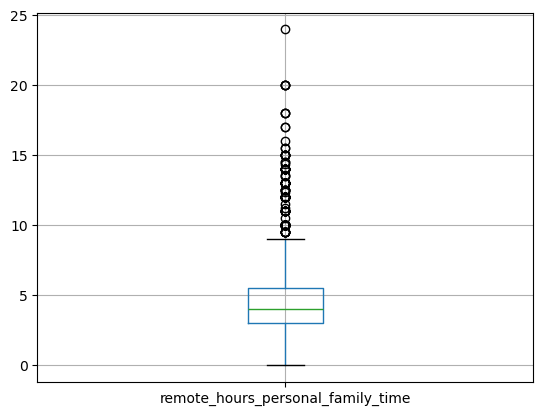

In [30]:
# Generate boxplot to examine outliers for 'remote_hours_personal_family_time'
final_df.boxplot(column = 'remote_hours_personal_family_time')

In [31]:
for column in final_df.select_dtypes(include=[np.float64]).columns:
    print(f"Column range in {column}: min: {final_df[column].min()} max: {final_df[column].max()}")

Column range in inperson_hours__commuting: min: 0.0 max: 20.0
Column range in inperson_hours__working: min: 0.0 max: 60.0
Column range in inperson_hours__personal_family_time: min: 0.0 max: 20.0
Column range in inperson_hours_domestic_responsibilities: min: -1.0 max: 20.0
Column range in remote_hours_commuting: min: 0.0 max: 24.0
Column range in remote_hours_working: min: 0.0 max: 40.0
Column range in remote_hours_personal_family_time: min: 0.0 max: 24.0
Column range in remote_hours_domestic_responsibilities: min: 0.0 max: 20.0


In [32]:
for column in final_df.select_dtypes(include=[np.float64]).columns:

    Min = final_df[column].mean() - (3*final_df[column].std())
    Max = final_df[column].mean() + (3*final_df[column].std())

    outliers = [x for x in final_df[column] if x < Min or x > Max]
    print(f"Identified outliers in {column}: %d" % len(outliers))

Identified outliers in inperson_hours__commuting: 38
Identified outliers in inperson_hours__working: 24
Identified outliers in inperson_hours__personal_family_time: 71
Identified outliers in inperson_hours_domestic_responsibilities: 39
Identified outliers in remote_hours_commuting: 72
Identified outliers in remote_hours_working: 24
Identified outliers in remote_hours_personal_family_time: 57
Identified outliers in remote_hours_domestic_responsibilities: 40


In [33]:
## If the response is an outlier more than 3 standard deviations beyond the mean, reset the value to the column's median
for column in final_df.select_dtypes(include=[np.float64]).columns:
    Min = final_df[column].mean() - (3*final_df[column].std())
    Max = final_df[column].mean() + (3*final_df[column].std())
    for x in final_df[column]:
        if x < Min or x > Max:
            final_df[column]=final_df[column].replace(x,final_df[column].median())
        else:
            final_df[column]=final_df[column]

In [34]:
## Print the range of values for each float64 column to confirm extreme outliers have been corrected
for column in final_df.select_dtypes(include=[np.float64]).columns:
    print(f"Column range in {column}: min: {final_df[column].min()} max: {final_df[column].max()}")

Column range in inperson_hours__commuting: min: 0.0 max: 6.0
Column range in inperson_hours__working: min: 1.0 max: 14.0
Column range in inperson_hours__personal_family_time: min: 0.0 max: 11.0
Column range in inperson_hours_domestic_responsibilities: min: -1.0 max: 8.0
Column range in remote_hours_commuting: min: 0.0 max: 5.0
Column range in remote_hours_working: min: 1.0 max: 15.0
Column range in remote_hours_personal_family_time: min: 0.0 max: 12.0
Column range in remote_hours_domestic_responsibilities: min: 0.0 max: 8.0


In [35]:
final_df

,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,if_no_covid_i_would_have_choice_about_rw,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities
0,0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,I’m 50% more productive when working remotely ...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1976,Male,Other Services,Professionals - ICT Professionals,More than 200,No,Couple with dependent children,More than 5 years,Metro,...,Somewhat likely,I’m 50% more productive when working remotely ...,2.0,6.0,7.0,1.0,0.0,8.0,7.0,1.0
2,2,1971,Male,Construction,Professionals - ICT Professionals,More than 200,No,Couple with no dependent children,More than 5 years,Metro,...,Neither unlikely or likely,I’m 50% more productive when working remotely ...,1.5,8.0,6.0,2.0,0.0,10.0,4.0,4.0
3,3,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,I’m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
4,4,1978,Female,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,No,Single person,Between 6 and 12 months,Metro,...,Very likely,My productivity is about same when I work remo...,3.0,8.0,4.0,1.0,1.0,8.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,3014,1995,Male,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Yes,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat likely,I’m 30% more productive when working remotely,2.0,8.0,3.0,4.0,3.0,8.0,3.0,3.0
3015,3015,1993,Female,Health Care and Social Assistance,Professionals - Health Professionals,Between 5 and 19,Yes,Multiple family household,More than 5 years,Metro,...,Very unlikely,My productivity is about same when I work remo...,3.0,10.0,2.0,2.0,1.0,8.0,4.0,3.0
3016,3016,1979,Female,Administrative and Support,Clerical and administrative workers - Clerical...,Between 20 and 199,No,One parent family with dependent children,More than 5 years,Regional,...,Very unlikely,My productivity is about same when I work remo...,3.0,7.0,2.0,4.0,1.0,7.0,4.0,4.0
3017,3017,1965,Female,Education and Training,"Managers - Chief Executives, General Managers ...",Between 1 and 4,Yes,Couple with no dependent children,More than 5 years,Metro,...,Somewhat likely,My productivity is about same when I work remo...,1.0,7.0,4.0,4.0,0.5,7.0,4.5,4.0


In [36]:
#Genrate a list of Categorical Variables
categorical_df = final_df.dtypes[final_df.dtypes == "object"].index.tolist()


In [37]:
categorical_df

['gender',
 'industry_desc',
 'occupation_desc',
 'organization_size',
 'manage_others',
 'household',
 'years_at_job',
 'metro_or_regional',
 'rw_percentage_2020',
 'org_encouraged_rw',
 'org_prepared_for_rw',
 'rw_is_common_at_org',
 'rw_permission_is_attainable',
 'rw_collaboration_easy',
 'preferred_rw_percentage_2020',
 'preferred_rw_percentage_future',
 'if_no_covid_employer_encourage_rw',
 'if_no_covid_employer_support_rw',
 'if_no_covid_i_would_have_choice_about_rw',
 'productivity_remote_vs_office']

In [38]:
final_df[categorical_df].nunique()


gender                                       5
industry_desc                               26
occupation_desc                             50
organization_size                            6
manage_others                                3
household                                    8
years_at_job                                 3
metro_or_regional                            2
rw_percentage_2020                          13
org_encouraged_rw                            6
org_prepared_for_rw                          6
rw_is_common_at_org                          6
rw_permission_is_attainable                  6
rw_collaboration_easy                        6
preferred_rw_percentage_2020                13
preferred_rw_percentage_future              14
if_no_covid_employer_encourage_rw           10
if_no_covid_employer_support_rw             10
if_no_covid_i_would_have_choice_about_rw    10
productivity_remote_vs_office               12
dtype: int64

In [39]:
industry_counts = final_df.industry_desc.value_counts()
industry_counts

industry_desc
Education and Training                             294
Information Media and Telecommunications           263
Professional, Scientific and Technical Services    259
Other Services                                     222
Health Care and Social Assistance                  219
Financial and Insurance                            204
Retail Trade                                       173
Financial and Insurance Services                   173
Professional, Scientific and Technical             163
Manufacturing                                      149
Public Administration and Safety                   147
Construction                                       127
Transport, Postal and Warehousing                  104
Wholesale Trade                                     94
Administrative and Support Services                 76
Administrative and Support                          70
Arts and Recreation Services                        38
Arts and Recreation                                

<Axes: ylabel='Density'>

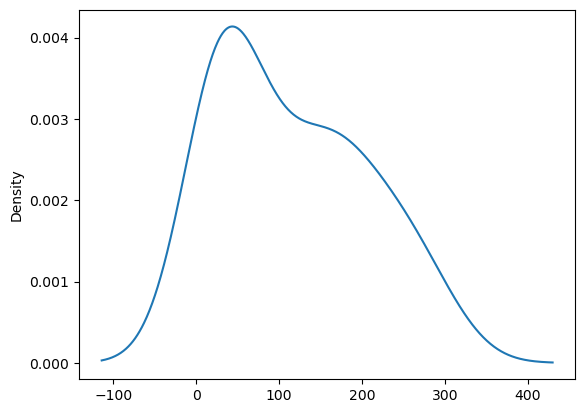

In [40]:
industry_counts.plot.density()

In [41]:
replace_industries = list(industry_counts[industry_counts < 150].index)

# Replace in DataFrame
for industry in replace_industries:
    final_df.industry_desc = final_df.industry_desc.replace(industry,"Other")

# Check to make sure binning was successful
final_df.industry_desc.value_counts()

industry_desc
Other                                              1049
Education and Training                              294
Information Media and Telecommunications            263
Professional, Scientific and Technical Services     259
Other Services                                      222
Health Care and Social Assistance                   219
Financial and Insurance                             204
Retail Trade                                        173
Financial and Insurance Services                    173
Professional, Scientific and Technical              163
Name: count, dtype: int64

In [42]:

# Print the number of occupations in the occupation_desc column
occupation_counts = final_df.occupation_desc.value_counts()
occupation_counts

occupation_desc
Professionals                                                                               580
Managers                                                                                    503
Managers - Specialist Managers                                                              240
Clerical and administrative                                                                 223
Managers - Chief Executives, General Managers and Legislators                               191
Professionals - Business, Human Resource and Marketing Professionals                        166
Professionals - ICT Professionals                                                           108
Professionals - Education Professionals                                                     103
Sales                                                                                        79
Professionals - Design, Engineering, Science and Transport Professionals                     76
Technicians and trades  

<Axes: ylabel='Density'>

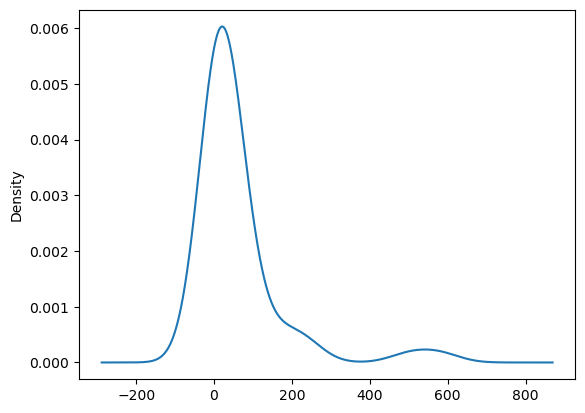

In [43]:
occupation_counts.plot.density()


In [44]:
# Determine which values to replace
replace_occupations = list(occupation_counts[occupation_counts < 75].index)

# Replace in DataFrame
for occupation in replace_occupations:
    final_df.occupation_desc = final_df.occupation_desc.replace(occupation,"Other")

# Check to make sure binning was successful
final_df.occupation_desc.value_counts()

occupation_desc
Other                                                                       750
Professionals                                                               580
Managers                                                                    503
Managers - Specialist Managers                                              240
Clerical and administrative                                                 223
Managers - Chief Executives, General Managers and Legislators               191
Professionals - Business, Human Resource and Marketing Professionals        166
Professionals - ICT Professionals                                           108
Professionals - Education Professionals                                     103
Sales                                                                        79
Professionals - Design, Engineering, Science and Transport Professionals     76
Name: count, dtype: int64

In [45]:
# Examine rw_percentage_(2020) responses -
# Survey Question: Thinking about your current job, how much of your time did you spend remote working in the last 3 months?
final_df['rw_percentage_2020'].value_counts()

rw_percentage_2020
100% - I spent all of my time remote working          909
50% - I spent about half of my time remote working    319
90%                                                   257
20%                                                   250
80%                                                   211
Less than 10% of my time                              207
30%                                                   179
40%                                                   162
10%                                                   136
60%                                                   135
70%                                                   126
Rarely or never                                        97
Rarely or never                                        31
Name: count, dtype: int64

In [46]:
rw_percentage_2020_map = {'Less than 10% of my time':'0-1 days',
                          'Rarely or never':'0-1 days',
                          'Rarely or never ':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - I spent about half of my time remote working':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - I spent all of my time remote working':'4-5 days'}

final_df['rw_percentage_2020']= final_df['rw_percentage_2020'].map(rw_percentage_2020_map)

In [47]:
# Confirm new response counts
final_df['rw_percentage_2020'].value_counts()

rw_percentage_2020
4-5 days    1377
2-3 days     481
0-1 days     471
1-2 days     429
3-4 days     261
Name: count, dtype: int64

In [48]:
# Examine preferred rw percentage (future) responses -
# Survey Question: "How much of your work time would you have preferred to work remotely during the last quarter of last year?
# This means October-December 2020
# If you work a 5 day week, each day of remote working equals 20% of your time.
final_df['preferred_rw_percentage_2020'].value_counts()

preferred_rw_percentage_2020
100% - All of my time                           861
50% - About half of my time                     500
20%                                             242
80%                                             240
90%                                             190
40%                                             174
60%                                             153
70%                                             146
Less than 10% of my time                        131
30%                                             126
10%                                             103
I would not have preferred to work remotely      91
I would not have preferred to work remotely      62
Name: count, dtype: int64

In [49]:
preferred_rw_percentage_2020_map = {'Less than 10% of my time':'0-1 days',
                          'I would not have preferred to work remotely':'0-1 days',
                          'I would not have preferred to work remotely ':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - About half of my time':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - All of my time':'4-5 days',
                          'No response':'No response'}

final_df['preferred_rw_percentage_2020']= final_df['preferred_rw_percentage_2020'].map(preferred_rw_percentage_2020_map)

In [50]:
final_df['preferred_rw_percentage_2020'].value_counts()


preferred_rw_percentage_2020
4-5 days    1291
2-3 days     674
0-1 days     387
1-2 days     368
3-4 days     299
Name: count, dtype: int64

In [51]:
# Examine preferred rw percentage (future) responses -
# Survey Question: "Imagine that COVID-19 is cured or eradicated.
# Going forward, how much of your work time would you prefer to work remotely?
# If you work a 5 day week, each day of remote working equals 20% of your time."
final_df['preferred_rw_percentage_future'].value_counts()

preferred_rw_percentage_future
50% - About half of my time             583
100% - All of my time                   390
20%                                     284
80%                                     253
40%                                     219
60%                                     211
30%                                     172
70%                                     167
90%                                     158
Less than 10% of my time                139
No response                             136
I would prefer not to work remotely     110
10%                                     108
I would prefer not to work remotely      89
Name: count, dtype: int64

In [52]:
preferred_rw_percentage_future_map = {'Less than 10% of my time':'0-1 days',
                          'I would prefer not to work remotely':'0-1 days',
                          'I would prefer not to work remotely ':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - About half of my time':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - All of my time':'4-5 days',
                          'No response':'No response'}

final_df['preferred_rw_percentage_future']= final_df['preferred_rw_percentage_future'].map(preferred_rw_percentage_future_map)
     

In [53]:
# Confirm new response counts to preferred_rw_percentage_(future)
final_df['preferred_rw_percentage_future'].value_counts()

preferred_rw_percentage_future
2-3 days       802
4-5 days       801
1-2 days       456
0-1 days       446
3-4 days       378
No response    136
Name: count, dtype: int64

In [54]:
# Examine productivity_(remote_vs_office) responses -
# Survey Question: "This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.
# Please compare your productivity when you work remotely to when you work at your employerís workplace.
# Roughly how productive are you, each hour, when you work remotely?"
final_df['productivity_remote_vs_office'].value_counts()


productivity_remote_vs_office
My productivity is about same when I work remotely          767
I’m 50% more productive when working remotely (or more)     498
I’m 20% more productive when working remotely               437
I’m 30% more productive when working remotely               430
I’m 10% more productive when working remotely               212
I’m 40% more productive when working remotely               195
I’m 10% less productive when working remotely               168
I’m 20% less productive when working remotely               164
I’m 30% less productive when working remotely                81
I’m 50% less productive when working remotely (or less)      27
I’m 50% less productive when working remotely (or worse)     23
I’m 40% less productive when working remotely                17
Name: count, dtype: int64

In [55]:
productivity_remote_vs_office_map = {'I’m 50% more productive when working remotely (or more)':'much more productive',
                          'I’m 40% more productive when working remotely':'much more productive',
                          'I’m 30% more productive when working remotely':'much more productive',
                          'I’m 20% more productive when working remotely':'more productive',
                          'I’m 10% more productive when working remotely':'more productive',
                          'My productivity is about same when I work remotely':'same productivity',
                          'I’m 10% less productive when working remotely':'less productive',
                          'I’m 20% less productive when working remotely':'less productive',
                          'I’m 30% less productive when working remotely':'much less productive',
                          'I’m 40% less productive when working remotely':'much less productive',
                          'I’m 50% less productive when working remotely (or less)':'much less productive',
                          'I’m 50% less productive when working remotely (or worse)':'much less productive'}

final_df['productivity_remote_vs_office']= final_df['productivity_remote_vs_office'].map(productivity_remote_vs_office_map)

In [56]:
# Confirm new response counts to productivity_(remote_vs_office)
final_df['productivity_remote_vs_office'].value_counts()


productivity_remote_vs_office
much more productive    1123
same productivity        767
more productive          649
less productive          332
much less productive     148
Name: count, dtype: int64

In [57]:
# Check dataframe changes
final_df.head()

,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,if_no_covid_i_would_have_choice_about_rw,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities
0,0,1972,Female,Other,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,much more productive,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1976,Male,Other Services,Professionals - ICT Professionals,More than 200,No,Couple with dependent children,More than 5 years,Metro,...,Somewhat likely,much more productive,2.0,6.0,7.0,1.0,0.0,8.0,7.0,1.0
2,2,1971,Male,Other,Professionals - ICT Professionals,More than 200,No,Couple with no dependent children,More than 5 years,Metro,...,Neither unlikely or likely,much more productive,1.5,8.0,6.0,2.0,0.0,10.0,4.0,4.0
3,3,1972,Male,Other,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,less productive,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
4,4,1978,Female,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,No,Single person,Between 6 and 12 months,Metro,...,Very likely,same productivity,3.0,8.0,4.0,1.0,1.0,8.0,5.0,2.0


In [58]:
# Add a variable representing the time difference spend on commuting between in-person and remote commute
final_df['commute_time_difference'] = final_df['inperson_hours__commuting']-final_df['remote_hours_commuting']
# Confirm new column was added
final_df.columns

Index(['responder_id', 'birth_year', 'gender', 'industry_desc',
       'occupation_desc', 'organization_size', 'manage_others', 'household',
       'years_at_job', 'metro_or_regional', 'rw_percentage_2020',
       'org_encouraged_rw', 'org_prepared_for_rw', 'rw_is_common_at_org',
       'rw_permission_is_attainable', 'rw_collaboration_easy',
       'preferred_rw_percentage_2020', 'preferred_rw_percentage_future',
       'if_no_covid_employer_encourage_rw', 'if_no_covid_employer_support_rw',
       'if_no_covid_i_would_have_choice_about_rw',
       'productivity_remote_vs_office', 'inperson_hours__commuting',
       'inperson_hours__working', 'inperson_hours__personal_family_time',
       'inperson_hours_domestic_responsibilities', 'remote_hours_commuting',
       'remote_hours_working', 'remote_hours_personal_family_time',
       'remote_hours_domestic_responsibilities', 'commute_time_difference'],
      dtype='object')

In [59]:
final_df['commute_time_difference'].describe()


count    3019.000000
mean        1.189238
std         1.302889
min        -5.000000
25%         0.250000
50%         1.000000
75%         2.000000
max         6.000000
Name: commute_time_difference, dtype: float64

In [60]:
final_df.head()


,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities,commute_time_difference
0,0,1972,Female,Other,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,much more productive,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0,1.5
1,1,1976,Male,Other Services,Professionals - ICT Professionals,More than 200,No,Couple with dependent children,More than 5 years,Metro,...,much more productive,2.0,6.0,7.0,1.0,0.0,8.0,7.0,1.0,2.0
2,2,1971,Male,Other,Professionals - ICT Professionals,More than 200,No,Couple with no dependent children,More than 5 years,Metro,...,much more productive,1.5,8.0,6.0,2.0,0.0,10.0,4.0,4.0,1.5
3,3,1972,Male,Other,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,less productive,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0,2.0
4,4,1978,Female,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,No,Single person,Between 6 and 12 months,Metro,...,same productivity,3.0,8.0,4.0,1.0,1.0,8.0,5.0,2.0,2.0


In [61]:
final_df.to_csv("final_cleaned.csv", index=False)

In [62]:
df= pd.read_csv("final_cleaned.csv",encoding='cp1252')

In [63]:
df.head()

,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities,commute_time_difference
0,0,1972,Female,Other,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,much more productive,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0,1.5
1,1,1976,Male,Other Services,Professionals - ICT Professionals,More than 200,No,Couple with dependent children,More than 5 years,Metro,...,much more productive,2.0,6.0,7.0,1.0,0.0,8.0,7.0,1.0,2.0
2,2,1971,Male,Other,Professionals - ICT Professionals,More than 200,No,Couple with no dependent children,More than 5 years,Metro,...,much more productive,1.5,8.0,6.0,2.0,0.0,10.0,4.0,4.0,1.5
3,3,1972,Male,Other,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,less productive,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0,2.0
4,4,1978,Female,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,No,Single person,Between 6 and 12 months,Metro,...,same productivity,3.0,8.0,4.0,1.0,1.0,8.0,5.0,2.0,2.0


In [64]:
df.columns


Index(['responder_id', 'birth_year', 'gender', 'industry_desc',
       'occupation_desc', 'organization_size', 'manage_others', 'household',
       'years_at_job', 'metro_or_regional', 'rw_percentage_2020',
       'org_encouraged_rw', 'org_prepared_for_rw', 'rw_is_common_at_org',
       'rw_permission_is_attainable', 'rw_collaboration_easy',
       'preferred_rw_percentage_2020', 'preferred_rw_percentage_future',
       'if_no_covid_employer_encourage_rw', 'if_no_covid_employer_support_rw',
       'if_no_covid_i_would_have_choice_about_rw',
       'productivity_remote_vs_office', 'inperson_hours__commuting',
       'inperson_hours__working', 'inperson_hours__personal_family_time',
       'inperson_hours_domestic_responsibilities', 'remote_hours_commuting',
       'remote_hours_working', 'remote_hours_personal_family_time',
       'remote_hours_domestic_responsibilities', 'commute_time_difference'],
      dtype='object')

In [65]:
df.rename(columns={'rw_percentage_2020': 'actual_remote_days'}, inplace=True)


### Exploratory Data Analysis

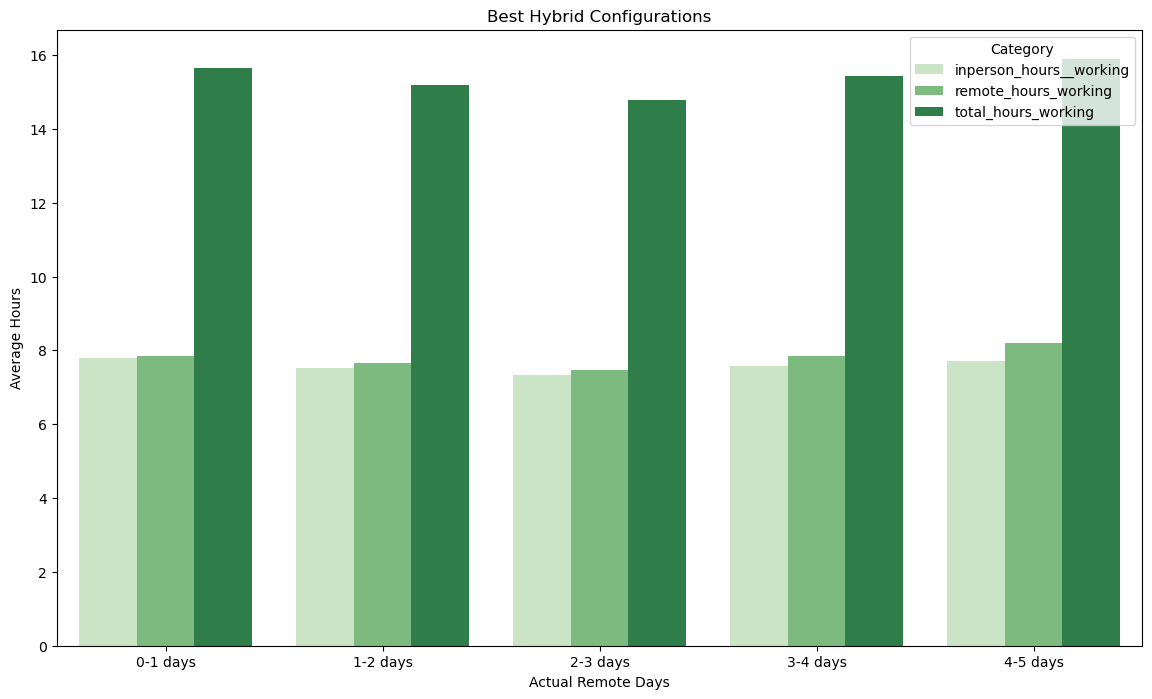

In [66]:
numeric_columns = ['inperson_hours__working', 'remote_hours_working']

# Calculating total hours
df['total_hours_working'] = df['remote_hours_working'] + df['inperson_hours__working']
numeric_columns.append('total_hours_working')

# Grouping data by actual remote days and calculating the mean for each numeric column
data_grouped = df.groupby('actual_remote_days')[numeric_columns].mean().reset_index()

# Melting the data for easier plotting
data_melted = data_grouped.melt(id_vars='actual_remote_days', value_vars=numeric_columns)

# Creating a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='actual_remote_days', y='value', hue='variable', data=data_melted, palette='Greens')
plt.title('Best Hybrid Configurations')
plt.xlabel('Actual Remote Days')
plt.ylabel('Average Hours')
plt.legend(title='Category', loc='upper right')
plt.show()

C:\Users\yasas\AppData\Local\Temp\ipykernel_35640\3162641738.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_grouped = filtered_data.groupby(['age_group', 'gender']).size().unstack().fillna(0)


<Figure size 1400x800 with 0 Axes>

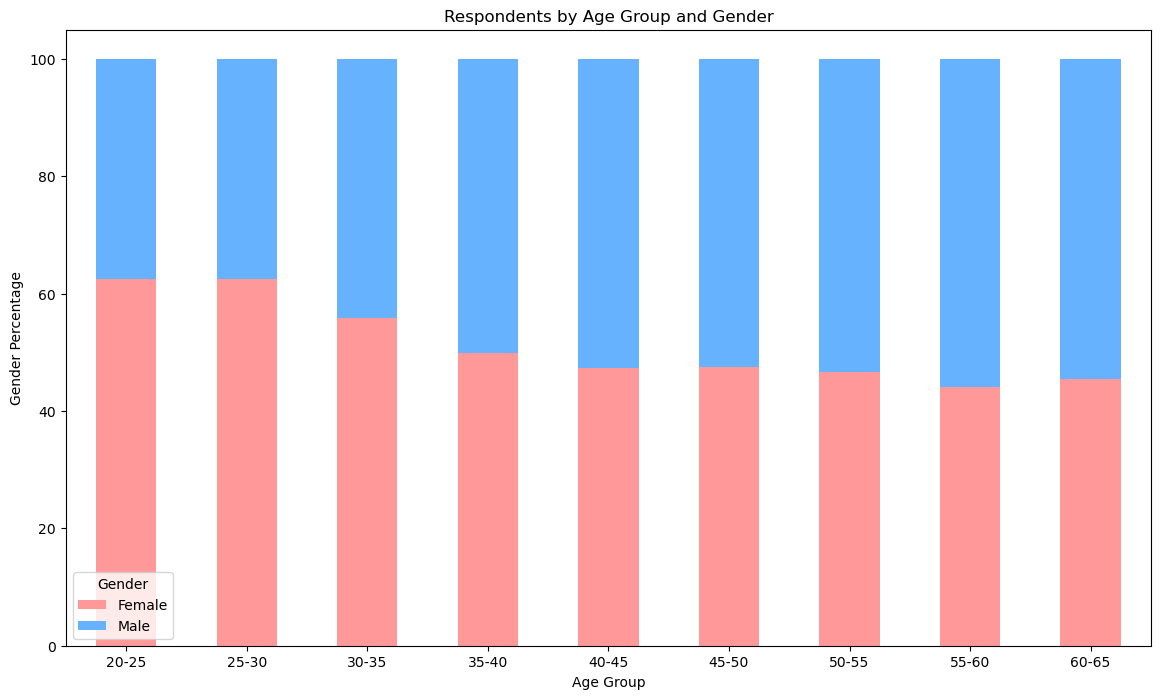

In [67]:
df['age'] = 2025 - df['birth_year']

# Define age bins and labels
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65']

# Bin the ages
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Filter relevant data and calculate percentages
filtered_data = df[df['gender'].isin(['Male', 'Female', 'Unknown'])]
age_gender_grouped = filtered_data.groupby(['age_group', 'gender']).size().unstack().fillna(0)
age_gender_percentage_grouped = age_gender_grouped.div(age_gender_grouped.sum(axis=1), axis=0) * 100

# Plot the data
plt.figure(figsize=(14, 8))
age_gender_percentage_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#FF9999', '#66B2FF', '#FFD700'])
plt.title('Respondents by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Gender Percentage')
plt.legend(title='Gender', loc='lower left')
plt.xticks(rotation=0)
plt.show()

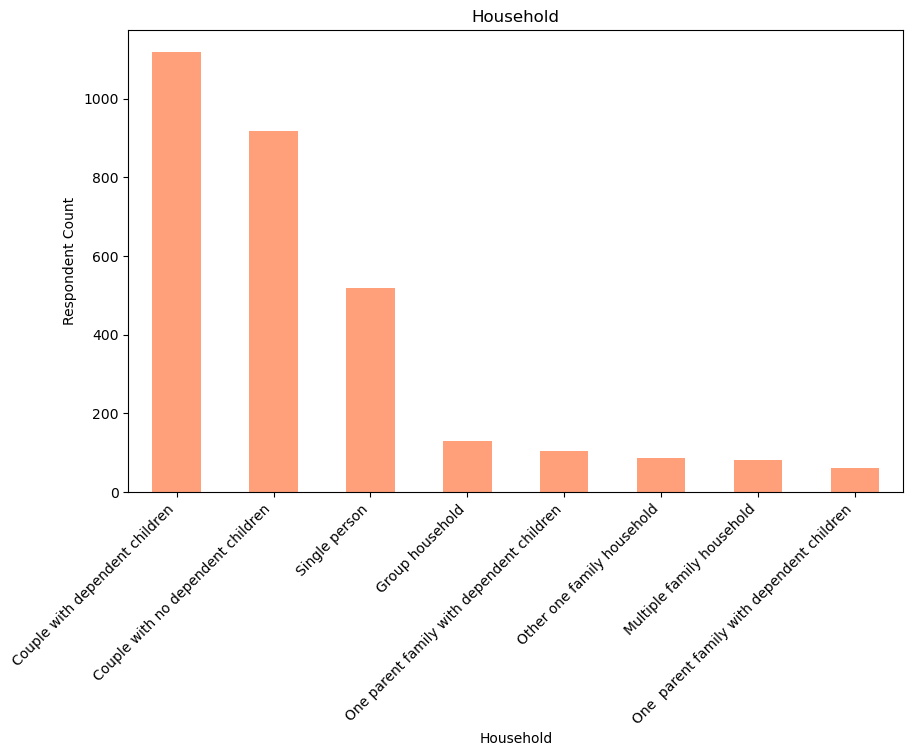

In [68]:
household_counts = df['household'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
household_counts.plot(kind='bar', color='#FFA07A')
plt.title('Household')
plt.xlabel('Household')
plt.ylabel('Respondent Count')
plt.xticks(rotation=45, ha='right')
plt.show()

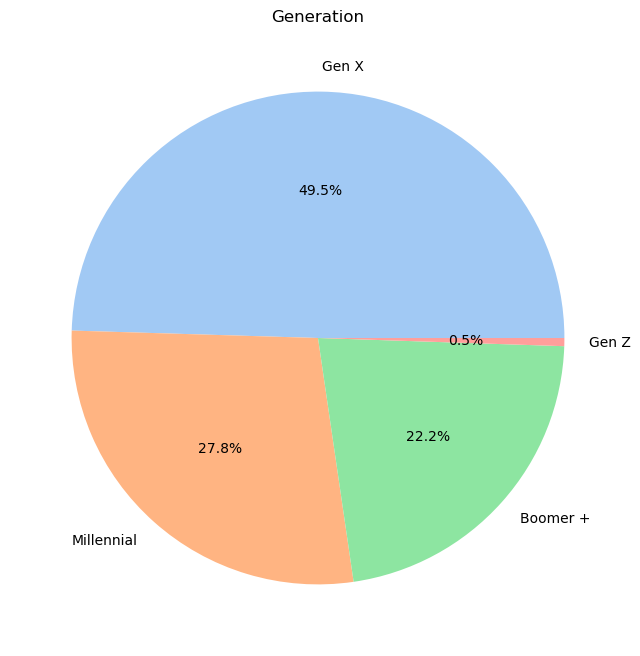

In [69]:
# Create a generation column based on age
def categorize_generation(age):
    if age < 25:
        return 'Gen Z'
    elif age < 40:
        return 'Millennial'
    elif age < 60:
        return 'Gen X'
    else:
        return 'Boomer +'

df['generation'] = df['age'].apply(categorize_generation)

# Count the number of respondents in each generation
generation_counts = df['generation'].value_counts()

# Plotting the pie chart using both matplotlib and seaborn
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")[0:4]
plt.pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Generation')
plt.show()
     

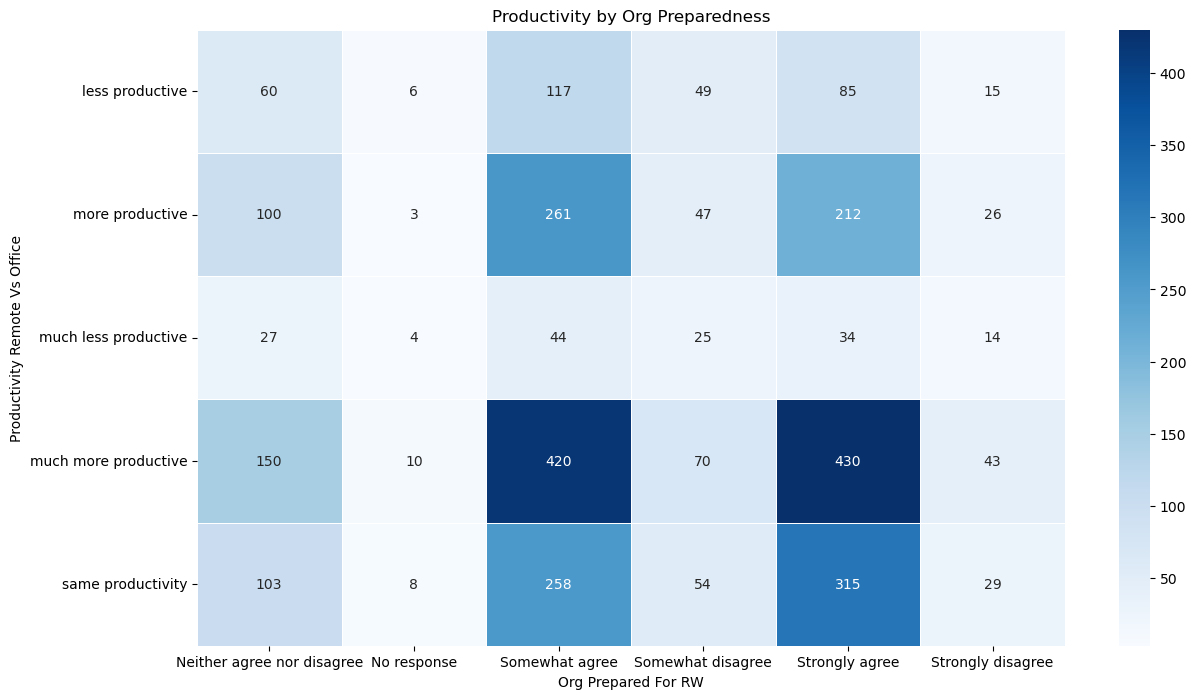

In [70]:
# Preparing the data for the heatmap
pivot_data = df.pivot_table(
    values='responder_id',
    index='productivity_remote_vs_office',
    columns='org_prepared_for_rw',
    aggfunc='count',
    fill_value=0
)

# Plotting the heatmap using both matplotlib and seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Productivity by Org Preparedness')
plt.xlabel('Org Prepared For RW')
plt.ylabel('Productivity Remote Vs Office')
plt.show()

<Figure size 1400x800 with 0 Axes>

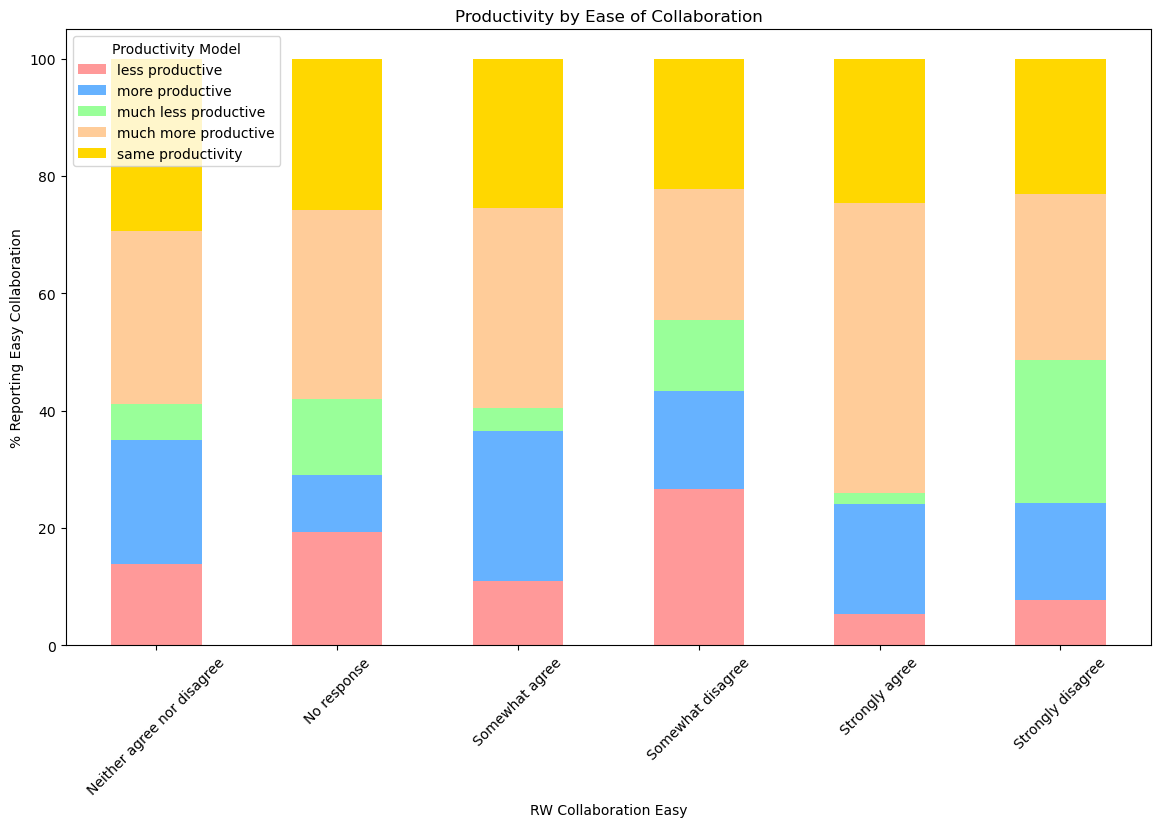

In [71]:
collaboration_data = df.pivot_table(
    values='responder_id',
    index='productivity_remote_vs_office',
    columns='rw_collaboration_easy',
    aggfunc='count',
    fill_value=0
)

# Normalizing the data to get the percentage
collaboration_data_percent = collaboration_data.div(collaboration_data.sum(axis=0), axis=1) * 100

# Define a color palette with more differentiating colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
collaboration_data_percent.T.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)
plt.title('Productivity by Ease of Collaboration')
plt.xlabel('RW Collaboration Easy')
plt.ylabel('% Reporting Easy Collaboration')
plt.legend(title='Productivity Model', loc='upper left')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

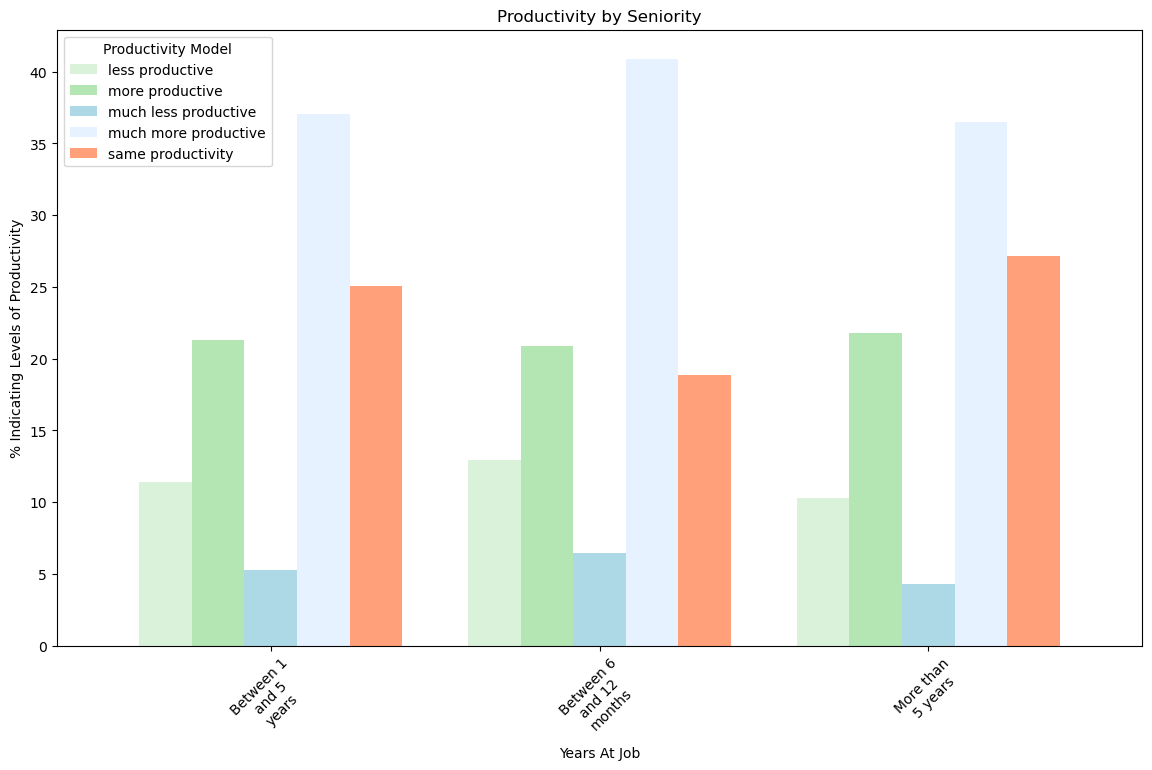

In [72]:
seniority_data = df.pivot_table(
    values='responder_id',
    index='years_at_job',
    columns='productivity_remote_vs_office',
    aggfunc='count',
    fill_value=0
)

# Normalizing the data to get the percentage
seniority_data_percent = seniority_data.div(seniority_data.sum(axis=1), axis=0) * 100

# Define a specific color palette based on the requirements
colors = ['#d9f2d9', '#b3e6b3', '#add8e6', '#e6f2ff', '#ffa07a']  # Including a fifth color to handle the fifth category

# Plotting the grouped bar chart with the specified color palette
plt.figure(figsize=(14, 8))

# Plotting
ax = seniority_data_percent.plot(kind='bar', stacked=False, color=colors, width=0.8, figsize=(14, 8))
plt.title('Productivity by Seniority')
plt.xlabel('Years At Job')
plt.ylabel('% Indicating Levels of Productivity')
plt.legend(title='Productivity Model', loc='upper left')

# Wrapping the x-axis labels
ax.set_xticklabels(['\n'.join(textwrap.wrap(label, 10)) for label in seniority_data_percent.index], rotation=45)

plt.show()

In [73]:
# Calculate monthly remote work hours and monthly in-person work hours for each employee
df['monthly_remote_work_hours'] = df['remote_hours_working'] * 4  # Assuming 4 weeks in a month
df['monthly_inperson_work_hours'] = df['inperson_hours__working'] * 4  # Assuming 4 weeks in a month

# Display the first few rows to verify the new columns
df[['responder_id', 'monthly_remote_work_hours', 'monthly_inperson_work_hours']].head()

,responder_id,monthly_remote_work_hours,monthly_inperson_work_hours
0,0,32.0,32.0
1,1,32.0,24.0
2,2,40.0,32.0
3,3,28.0,28.0
4,4,32.0,32.0


C:\Users\yasas\AppData\Local\Temp\ipykernel_35640\3530785194.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['monthly_remote_work_hours'] = filtered_data['remote_hours_working'] * 4  # Assuming 4 weeks in a month


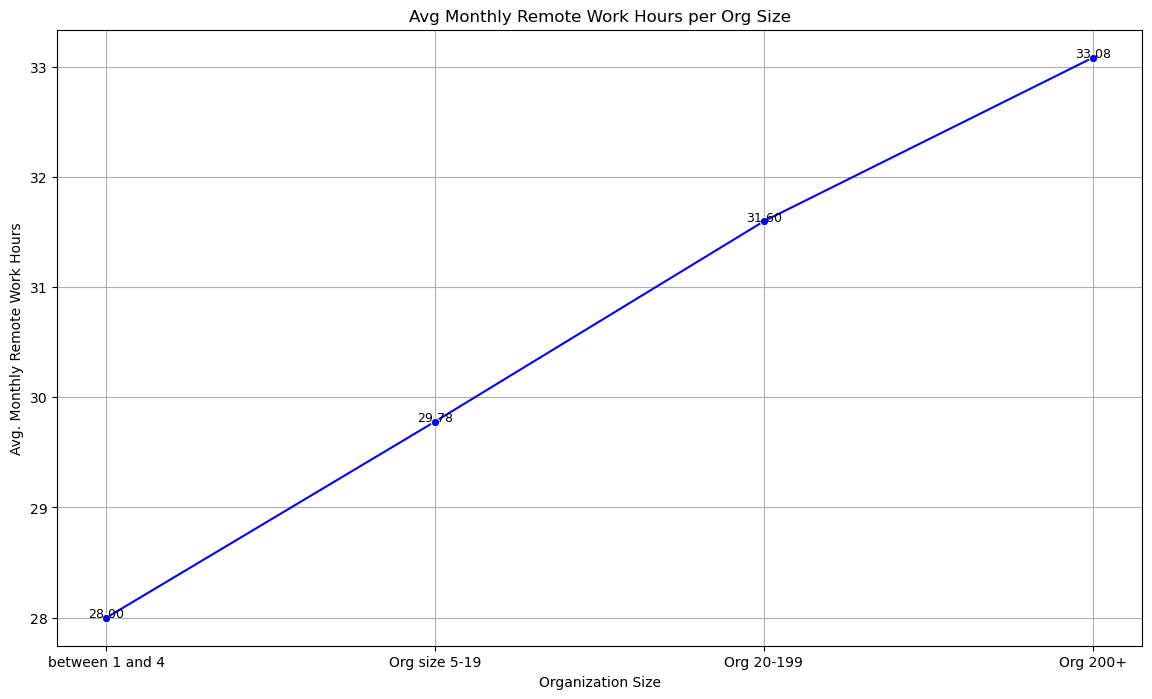

In [74]:
# Define the categories for organization size in the desired order
categories = ['between 1 and 4', 'Org size 5-19', 'Org 20-199', 'Org 200+']

# Mapping organization sizes to categories
def map_org_size(org_size):
    if '1 and 4' in org_size:
        return 'between 1 and 4'
    elif '5 and 19' in org_size:
        return 'Org size 5-19'
    elif '20 and 199' in org_size:
        return 'Org 20-199'
    elif '200' in org_size:
        return 'Org 200+'
    else:
        return 'Other'

df['org_size_category'] = df['organization_size'].apply(map_org_size)
filtered_data = df[df['org_size_category'].isin(categories)]

# Calculate monthly remote work hours (make sure this is executed)
filtered_data['monthly_remote_work_hours'] = filtered_data['remote_hours_working'] * 4  # Assuming 4 weeks in a month

# Calculate the average monthly remote work hours per category
org_size_data = filtered_data.groupby('org_size_category')['monthly_remote_work_hours'].mean().reindex(categories).reset_index()

# Plotting the line chart using both matplotlib and seaborn
plt.figure(figsize=(14, 8))

sns.lineplot(x='org_size_category', y='monthly_remote_work_hours', data=org_size_data, marker='o', color='b')

# Adding data labels
for x, y in zip(org_size_data['org_size_category'], org_size_data['monthly_remote_work_hours']):
    plt.text(x, y, f'{y:.2f}', fontsize=9, ha='center')

plt.title('Avg Monthly Remote Work Hours per Org Size')
plt.xlabel('Organization Size')
plt.ylabel('Avg. Monthly Remote Work Hours')
plt.grid(True)
plt.show()

C:\Users\yasas\AppData\Local\Temp\ipykernel_35640\429758581.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Work Type', y='Total Hours', data=org_size_200_data, palette=['#98FB98', '#228B22'])


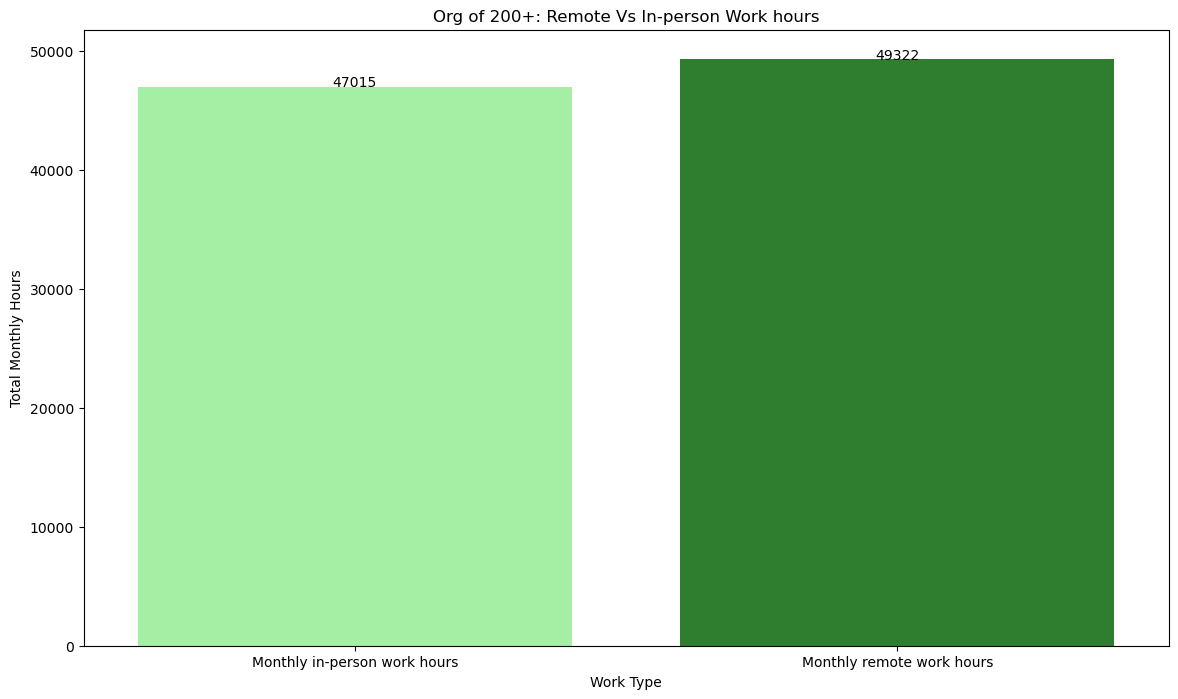

In [75]:
# Fix the syntax error in the plt.text function
# Filter data for organization size 200+
org_size_200_plus = df[df['org_size_category'] == 'Org 200+']

# Calculate total monthly in-person and remote work hours for organization size 200+
total_monthly_inperson_hours = org_size_200_plus['monthly_inperson_work_hours'].sum()
total_monthly_remote_hours = org_size_200_plus['monthly_remote_work_hours'].sum()

# Creating the dataset for the bar plot
org_size_200_data = pd.DataFrame({
    'Work Type': ['Monthly in-person work hours', 'Monthly remote work hours'],
    'Total Hours': [total_monthly_inperson_hours, total_monthly_remote_hours]
})

# Plotting the bar chart using both matplotlib and seaborn
plt.figure(figsize=(14, 8))

sns.barplot(x='Work Type', y='Total Hours', data=org_size_200_data, palette=['#98FB98', '#228B22'])

# Adding data labels
for index, row in org_size_200_data.iterrows():
    plt.text(index, row['Total Hours'], f'{row["Total Hours"]:.0f}', color='black', ha="center")

plt.title('Org of 200+: Remote Vs In-person Work hours')
plt.xlabel('Work Type')
plt.ylabel('Total Monthly Hours')
plt.show()


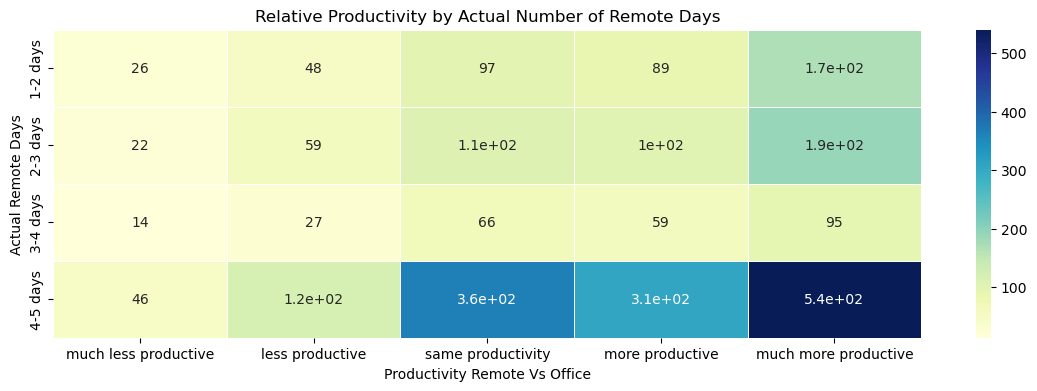

In [76]:
# Define the categories for actual remote days in the desired order
categories = ['1-2 days', '2-3 days', '3-4 days', '4-5 days']
productivity_categories = ['much less productive', 'less productive', 'same productivity', 'more productive', 'much more productive']

# Mapping Actual Remote Days to categories
def map_remote_days(remote_days):
    if remote_days == '1-2 days':
        return '1-2 days'
    elif remote_days == '2-3 days':
        return '2-3 days'
    elif remote_days == '3-4 days':
        return '3-4 days'
    elif remote_days == '4-5 days':
        return '4-5 days'
    else:
        return 'Other'

# Apply the mapping function
df['remote_days_category'] = df['actual_remote_days'].apply(map_remote_days)
filtered_data = df[df['remote_days_category'].isin(categories)]

# Pivot the data to create a matrix for the heatmap
pivot_data = filtered_data.pivot_table(
    values='responder_id',
    index='remote_days_category',
    columns='productivity_remote_vs_office',
    aggfunc='count',
    fill_value=0
)

# Ensure the correct order of columns and rows
pivot_data = pivot_data.reindex(index=categories, columns=productivity_categories)

# Plotting the heatmap using both matplotlib and seaborn
plt.figure(figsize=(14, 4))
sns.heatmap(pivot_data, annot=True,  cmap="YlGnBu", linewidths=.5)
plt.title('Relative Productivity by Actual Number of Remote Days')
plt.xlabel('Productivity Remote Vs Office')
plt.ylabel('Actual Remote Days')
plt.show()


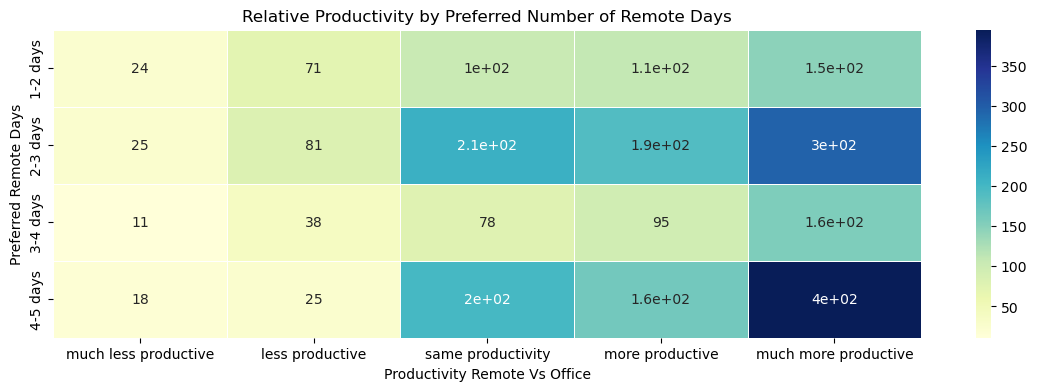

In [77]:
# Define the categories for preferred remote days in the desired order
categories = ['1-2 days', '2-3 days', '3-4 days', '4-5 days']
productivity_categories = ['much less productive', 'less productive', 'same productivity', 'more productive', 'much more productive']

# Mapping Preferred Remote Days to categories
def map_preferred_remote_days(preferred_days):
    if preferred_days == '1-2 days':
        return '1-2 days'
    elif preferred_days == '2-3 days':
        return '2-3 days'
    elif preferred_days == '3-4 days':
        return '3-4 days'
    elif preferred_days == '4-5 days':
        return '4-5 days'
    else:
        return 'Other'

# Apply the mapping function
df['preferred_days_category'] = df['preferred_rw_percentage_future'].apply(map_preferred_remote_days)
filtered_data = df[df['preferred_days_category'].isin(categories)]

# Pivot the data to create a matrix for the heatmap
pivot_data = filtered_data.pivot_table(
    values='responder_id',
    index='preferred_days_category',
    columns='productivity_remote_vs_office',
    aggfunc='count',
    fill_value=0
)

# Ensure the correct order of columns and rows
pivot_data = pivot_data.reindex(index=categories, columns=productivity_categories)

# Plotting the heatmap using both matplotlib and seaborn
plt.figure(figsize=(14, 4))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Relative Productivity by Preferred Number of Remote Days')
plt.xlabel('Productivity Remote Vs Office')
plt.ylabel('Preferred Remote Days')
plt.show()


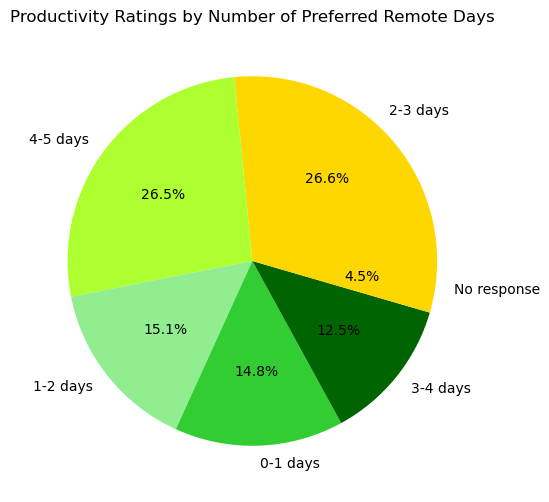

In [78]:
# Calculate the count of each preferred remote days category
preferred_days_counts = df['preferred_rw_percentage_future'].value_counts()

# Plotting the pie chart using both matplotlib and seaborn
plt.figure(figsize=(10, 6))

# Define a color palette for the categories
colors = ['#FFD700', '#ADFF2F', '#90EE90', '#32CD32', '#006400']

# Create the pie chart
plt.pie(preferred_days_counts, labels=preferred_days_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Productivity Ratings by Number of Preferred Remote Days')
plt.show()


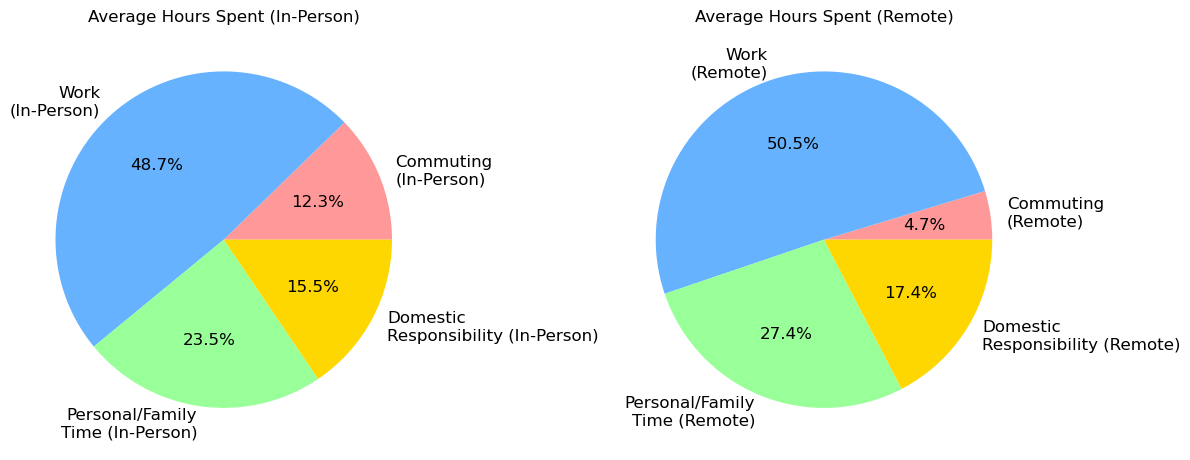

In [79]:
# Create the pie charts with increased size and wrapped text for clarity

# Calculate the averages for in-person hours categories
average_inperson_commuting = df['inperson_hours__commuting'].mean()
average_inperson_working = df['inperson_hours__working'].mean()
average_inperson_personal_family_time = df['inperson_hours__personal_family_time'].mean()
average_inperson_domestic_responsibilities = df['inperson_hours_domestic_responsibilities'].mean()

# Labels for the in-person pie chart
inperson_labels = [
    'Commuting\n(In-Person)',
    'Work\n(In-Person)',
    'Personal/Family\nTime (In-Person)',
    'Domestic\nResponsibility (In-Person)'
]
inperson_sizes = [average_inperson_commuting, average_inperson_working, average_inperson_personal_family_time, average_inperson_domestic_responsibilities]
inperson_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(inperson_sizes, labels=inperson_labels, autopct='%1.1f%%', colors=inperson_colors, textprops={'fontsize': 12})
plt.title('Average Hours Spent (In-Person)')

# Calculate the averages for remote hours categories
average_remote_commuting = df['remote_hours_commuting'].mean()
average_remote_working = df['remote_hours_working'].mean()
average_remote_personal_family_time = df['remote_hours_personal_family_time'].mean()
average_remote_domestic_responsibilities = df['remote_hours_domestic_responsibilities'].mean()

# Labels for the remote pie chart
remote_labels = [
    'Commuting\n(Remote)',
    'Work\n(Remote)',
    'Personal/Family\nTime (Remote)',
    'Domestic\nResponsibility (Remote)'
]
remote_sizes = [average_remote_commuting, average_remote_working, average_remote_personal_family_time, average_remote_domestic_responsibilities]
remote_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']

plt.subplot(1, 2, 2)
plt.pie(remote_sizes, labels=remote_labels, autopct='%1.1f%%', colors=remote_colors, textprops={'fontsize': 12})
plt.title('Average Hours Spent (Remote)')

plt.tight_layout()
plt.show()

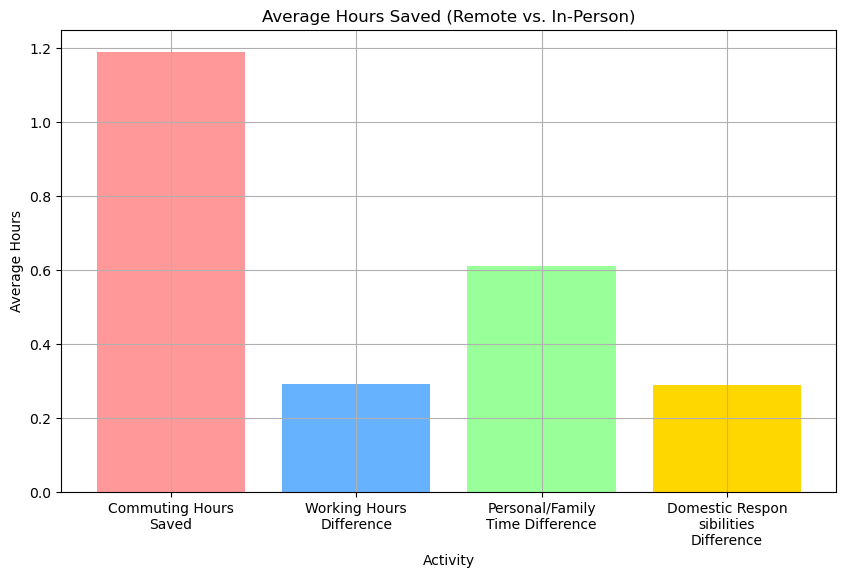

In [80]:
# Calculate the difference in hours between remote and in-person work for commuting, working, personal/family time, and domestic responsibilities
df['commuting_hours_saved'] = df['inperson_hours__commuting'] - df['remote_hours_commuting']
df['working_hours_difference'] = df['remote_hours_working'] - df['inperson_hours__working']
df['personal_family_time_difference'] = df['remote_hours_personal_family_time'] - df['inperson_hours__personal_family_time']
df['domestic_responsibilities_difference'] = df['remote_hours_domestic_responsibilities'] - df['inperson_hours_domestic_responsibilities']

# Calculate the average differences
average_differences = {
    'Commuting Hours Saved': df['commuting_hours_saved'].mean(),
    'Working Hours Difference': df['working_hours_difference'].mean(),
    'Personal/Family Time Difference': df['personal_family_time_difference'].mean(),
    'Domestic Responsibilities Difference': df['domestic_responsibilities_difference'].mean()
}


# Wrap text for x-axis labels
wrapped_labels = [ '\n'.join(textwrap.wrap(label, 15)) for label in average_differences.keys()]

# Create a bar plot to show the average differences with wrapped labels
plt.figure(figsize=(10, 6))
plt.bar(wrapped_labels, average_differences.values(), color=['#FF9999', '#66B2FF', '#99FF99', '#FFD700'])

# Adding labels and title
plt.xlabel('Activity')
plt.ylabel('Average Hours')
plt.title('Average Hours Saved (Remote vs. In-Person)')
plt.grid(True)
plt.show()